Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [4]:
df=pd.read_csv("data/insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Preparing X and Y variables

In [5]:
X=df.drop(columns=['charges'],axis=1)

In [6]:
y=df['charges']

In [7]:
X.head(5)

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [8]:
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)

    ]
)

In [9]:
X=preprocessor.fit_transform(X)

In [10]:
X

array([[ 1.        ,  0.        ,  0.        , ..., -1.43876426,
        -0.45332   , -0.90861367],
       [ 0.        ,  1.        ,  1.        , ..., -1.50996545,
         0.5096211 , -0.07876719],
       [ 0.        ,  1.        ,  1.        , ..., -0.79795355,
         0.38330685,  1.58092576],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -1.50996545,
         1.0148781 , -0.90861367],
       [ 1.        ,  0.        ,  1.        , ..., -1.29636188,
        -0.79781341, -0.90861367],
       [ 1.        ,  0.        ,  0.        , ...,  1.55168573,
        -0.26138796, -0.90861367]])

In [11]:
X.shape

(1338, 11)

In [14]:
# seperate dataset into train and test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((1070, 11), (268, 11))

Create an evaluation function to give all the metrics after model training


In [24]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return float(mae), float(rmse), float(r2_square)

In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6112.6505
- Mean Absolute Error: 4190.5530
- R2 Score: 0.7411
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5806.1518
- Mean Absolute Error: 4176.5126
- R2 Score: 0.7829


Lasso
Model performance for Training set
- Root Mean Squared Error: 6105.5476
- Mean Absolute Error: 4208.2781
- R2 Score: 0.7417
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5797.0192
- Mean Absolute Error: 4182.0187
- R2 Score: 0.7835


Ridge
Model performance for Training set
- Root Mean Squared Error: 6105.6089
- Mean Absolute Error: 4212.6410
- R2 Score: 0.7417
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5798.2986
- Mean Absolute Error: 4186.9019
- R2 Score: 0.7834


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4772.3523
- Mean Absolute Error: 2855.8264


Results

In [28]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.865093
5,Random Forest Regressor,0.863985
6,XGBRegressor,0.848485
8,AdaBoost Regressor,0.793600
1,Lasso,0.783538
2,Ridge,0.783443
0,Linear Regression,0.782856
3,K-Neighbors Regressor,0.764745
4,Decision Tree,0.705794


Linear Regression

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate R² score
score = r2_score(y_test, y_pred) * 100

# Print model accuracy
print("Accuracy of the Random Forest model is %.2f" % score)


Accuracy of the Random Forest model is 86.42


Plot y_pred and y_test

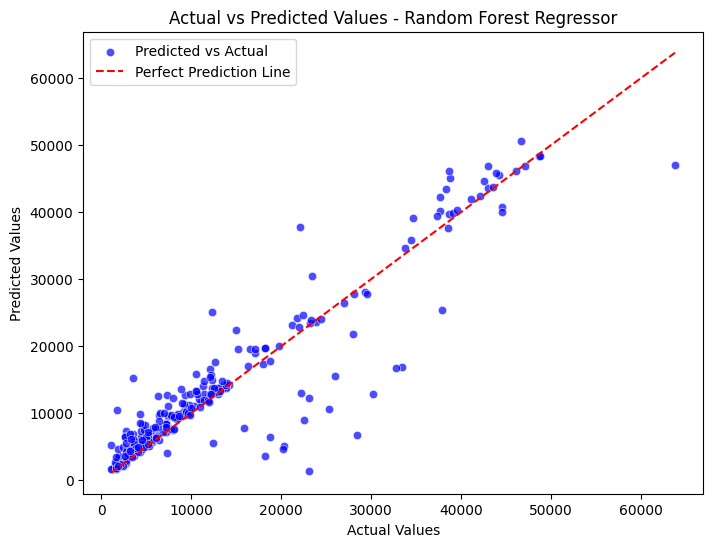

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')

# Plot a perfect prediction line (y = x) for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='dashed', color='red', label='Perfect Prediction Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Random Forest Regressor')
plt.legend()
plt.show()


<Axes: xlabel='charges'>

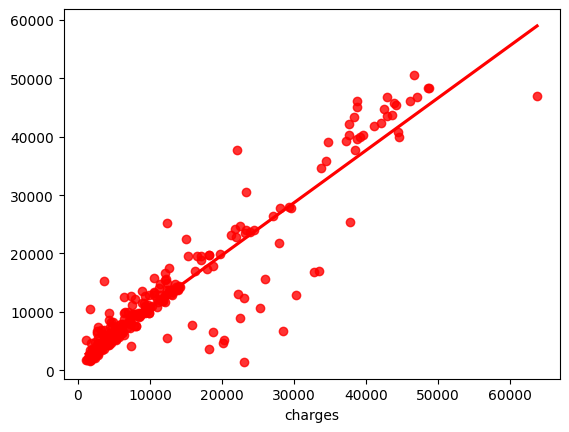

In [31]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

Difference between actual and ored value

In [32]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
764,9095.06825,9846.110683,-751.042433
887,5272.17580,5381.424801,-109.249001
890,29330.98315,28038.918946,1292.064204
1293,9301.89355,12691.281280,-3389.387730
259,33750.29180,34670.944866,-920.653066
...,...,...,...
109,47055.53210,46848.753671,206.778429
575,12222.89830,12931.528791,-708.630491
535,6067.12675,6347.261686,-280.134936
543,63770.42801,46981.415542,16789.012468
